# Part A: Data
# Introduction
This notebook contains all code that has been used to prepare the EStreams and other data for the analysis performed in the "How landscape data quality affects our perception of dominant processes in large-sample hydrology studies?" paper by do Nascimento et al. (in review). To be able to run this notebook, please ensure that you have downloaded the acompanying data of the paper. All links can be found in the data section of the paper.

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=Warning)


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Set the directory:
os.chdir(PATH)

In [3]:
path_estreams = r'/Users/nascimth/Documents/data/EStreams'

# Import data

### - Network information

In [4]:
network_estreams = pd.read_csv(path_estreams+'/streamflow_gauges/estreams_gauging_stations.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)

# Convert 'date_column' and 'time_column' to datetime
network_estreams['start_date'] = pd.to_datetime(network_estreams['start_date'])
network_estreams['end_date'] = pd.to_datetime(network_estreams['end_date'])

network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


In [5]:
estreams_signatures = pd.read_csv(path_estreams+'/hydroclimatic_signatures/estreams_hydrometeo_signatures.csv', encoding='utf-8')
estreams_signatures.set_index("basin_id", inplace = True)

# Mapping dictionary for reclassification
time_mapping = {
    'Fall': 1, 
    'Winter': 2,  
    'Spring': 3,  
    'Summer': 4, 
}

# Reclassify time classes using the mapping dictionary
estreams_signatures['hp_time'] = estreams_signatures['hp_time'].map(time_mapping)
estreams_signatures['lp_time'] = estreams_signatures['lp_time'].map(time_mapping)

# Subset the signatures to be used (only variables, not dates and number of measurments):
estreams_signatures = estreams_signatures.iloc[:, 0:-6]
estreams_signatures

,q_mean,q_runoff_ratio,q_elas_Sankarasubramanian,slope_sawicz,baseflow_index,hfd_mean,hfd_std,q_5,q_95,hq_freq,...,pet_mean,aridity,p_seasonality,frac_snow,hp_freq,hp_dur,hp_time,lp_freq,lp_dur,lp_time
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,2.824,0.727,1.266,1.505,0.760,237.600,12.858,1.029,6.607,0.077,...,1.499,0.395,0.309,0.326,13.239,1.172,4.0,198.993,3.561,1.0
AT000002,3.898,1.004,1.223,2.467,0.720,247.952,10.932,0.980,10.727,0.964,...,1.526,0.390,0.331,0.332,15.389,1.215,4.0,204.041,3.576,1.0
AT000003,0.915,0.247,1.802,0.979,0.687,233.361,27.141,0.404,2.819,6.136,...,1.516,0.411,0.346,0.337,15.212,1.203,4.0,202.001,3.592,1.0
AT000004,5.079,1.319,0.324,2.188,0.747,242.783,10.736,1.499,13.295,0.042,...,1.445,0.384,0.338,0.361,15.956,1.217,4.0,205.803,3.598,1.0
AT000005,3.319,0.806,0.820,1.967,0.756,239.207,14.642,1.064,7.692,0.233,...,1.814,0.448,0.328,0.200,15.266,1.186,4.0,201.796,3.547,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,0.150,0.088,2.387,NaN,0.354,189.111,72.114,0.000,0.797,81.511,...,2.196,1.354,-0.276,0.183,21.817,1.264,2.0,270.637,5.789,4.0
UAGR0018,0.475,0.266,2.041,NaN,0.207,160.444,42.925,0.000,3.631,60.508,...,2.148,1.270,-0.290,0.198,21.849,1.263,2.0,268.322,5.700,4.0
UAGR0019,0.312,0.194,2.893,NaN,0.354,184.667,59.422,0.000,1.412,127.517,...,2.216,1.494,-0.157,0.172,22.917,1.271,2.0,273.598,5.876,4.0


In [6]:
estreams_meteodensity = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_meteorology_density.csv', encoding='utf-8')
estreams_meteodensity.set_index("basin_id", inplace = True)

## Here we select only these variables as representative:
estreams_meteodensity = estreams_meteodensity[["stations_num_p_mean", "stations_num_t_mean"]]

estreams_meteodensity.head()

,stations_num_p_mean,stations_num_t_mean
basin_id,,
AT000001,22.0,23.0
AT000002,14.0,13.0
AT000003,18.0,18.0
AT000004,7.0,8.0
AT000005,10.0,10.0


In [7]:
estreams_topography = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_topography_attributes.csv', encoding='utf-8')
estreams_topography.set_index("basin_id", inplace = True)
estreams_topography

,ele_mt_max,ele_mt_mean,ele_mt_min,slp_dg_mean,flat_area_fra,steep_area_fra,elon_ratio,strm_dens
basin_id,,,,,,,,
AT000001,3555.408,1874.076,420.622,24.122,3.395,78.590,0.612,0.151
AT000002,2803.984,1773.178,674.209,26.095,0.463,87.662,0.539,0.151
AT000003,3293.054,1843.003,583.510,25.735,1.497,82.952,0.577,0.141
AT000004,2878.033,1890.429,1022.324,27.324,0.351,88.023,0.587,0.095
AT000005,2938.964,1772.902,567.275,28.647,1.719,83.629,0.612,0.134
...,...,...,...,...,...,...,...,...
UAGR0017,1537.278,564.291,161.399,11.810,4.283,24.393,0.634,0.129
UAGR0018,1511.835,749.565,16.793,19.438,2.114,61.735,0.621,0.024
UAGR0019,1449.416,653.127,306.877,9.655,17.055,20.545,0.739,0.112


In [8]:
estreams_hydrology = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_hydrology_attributes.csv', encoding='utf-8')
estreams_hydrology.set_index("basin_id", inplace = True)

# Here we select only these variables as representative
estreams_hydrology = estreams_hydrology[["dam_num", "res_num", "lakes_num", "lakes_tot_area", "lakes_tot_vol"]]
estreams_hydrology

,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol
basin_id,,,,,
AT000001,23.0,10.0,10.0,6.62,542.33
AT000002,0.0,0.0,0.0,0.00,0.00
AT000003,4.0,4.0,3.0,1.46,12.91
AT000004,0.0,0.0,0.0,0.00,0.00
AT000005,1.0,1.0,1.0,0.89,8.27
...,...,...,...,...,...
UAGR0017,0.0,0.0,1.0,1.43,16.43
UAGR0018,0.0,0.0,0.0,0.00,0.00
UAGR0019,0.0,0.0,1.0,0.31,1.54


In [9]:
estreams_soil = pd.read_csv(path_estreams+'/attributes/static_attributes/estreams_soil_attributes.csv', encoding='utf-8')
estreams_soil.set_index("basin_id", inplace = True)

# Here we select only these variables as representative
estreams_soil = estreams_soil[['root_dep_mean', 'root_dep_max', 'root_dep_min',
       'soil_tawc_mean', 'soil_fra_sand_mean', 'soil_fra_silt_mean',
       'soil_fra_clay_mean', 'soil_fra_grav_mean', 'soil_bd_mean','soil_oc_mean']]

estreams_soil

,root_dep_mean,root_dep_max,root_dep_min,soil_tawc_mean,soil_fra_sand_mean,soil_fra_silt_mean,soil_fra_clay_mean,soil_fra_grav_mean,soil_bd_mean,soil_oc_mean
basin_id,,,,,,,,,,
AT000001,81.571,130.0,0.0,28.738,58.196,16.337,7.973,9.062,1.303,1.218
AT000002,58.600,70.0,30.0,46.474,54.920,29.650,15.430,8.140,1.502,1.820
AT000003,51.660,130.0,0.0,45.044,49.262,30.836,16.883,10.294,1.425,1.714
AT000004,49.412,70.0,30.0,49.256,39.956,40.088,19.956,13.044,1.409,1.771
AT000005,31.781,100.0,0.0,44.098,39.795,38.151,20.685,17.658,1.384,1.836
...,...,...,...,...,...,...,...,...,...,...
UAGR0017,128.620,130.0,40.0,51.371,23.184,29.245,47.571,9.939,1.246,1.198
UAGR0018,73.061,130.0,40.0,64.165,30.592,39.122,30.286,7.469,1.066,2.340
UAGR0019,130.000,130.0,130.0,51.029,23.115,29.123,47.761,10.049,1.251,1.178


In [10]:
estreams_landcover = pd.read_csv(path_estreams+'//attributes/temporal_attributes/estreams_landcover_attributes.csv', encoding='utf-8')
estreams_landcover.set_index("basin_id", inplace = True)
estreams_landcover

# We have more than 20 classes, so it is better if we aggregate the classes in more representative ones:
# * 1. Urban, 2. Non irrigated aggriculture, 3. Irrigated aggriculture, 4. grassland and 5. forests

def aggregate_columns(df, years):
    # Initialize a dictionary to store aggregated columns
    aggregated_columns = {}

    # Iterate through each year
    for year in years:
        # Iterate through each column in the DataFrame
        for column in df.columns:
            # Check if the column name contains the specified year and the number is between 300 and 315 for forest
            if f'_{year}_' in column and 300 <= int(column.split('_')[-1]) < 315:
                prefix = '_'.join(column.split('_')[:-1]) + "_forest"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
            # Check if the column name contains the specified year and the number is between 315 and 400 for grass
            elif f'_{year}_' in column and 315 <= int(column.split('_')[-1]) < 400:
                prefix = '_'.join(column.split('_')[:-1]) + "_grass"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
            # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 212 <= int(column.split('_')[-1]) < 300:
                prefix = '_'.join(column.split('_')[:-1]) + "_Agric"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
        
            # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 200 <= int(column.split('_')[-1]) < 212:
                prefix = '_'.join(column.split('_')[:-1]) + "_NonIrriAgri"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]

             # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 111 <= int(column.split('_')[-1]) <= 124:
                prefix = '_'.join(column.split('_')[:-1]) + "_urban"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]                   
    # Iterate through the aggregated_columns dictionary and create new aggregated columns
    for prefix, columns in aggregated_columns.items():
        # Aggregate the columns by summing them along the columns axis
        df[prefix] = df[columns].sum(axis=1)
        # Drop the original columns
        df.drop(columns, axis=1, inplace=True)

# List of years to iterate over
years = [1990, 2000, 2006, 2012, 2018]

# Call the function to aggregate columns for each year
aggregate_columns(estreams_landcover, years)


# Filter only the columns already resampled:
estreams_landcover = estreams_landcover.iloc[:, -25:]

# Subset only one year to avoid co-correlation
estreams_landcover = estreams_landcover[["lulc_2006_urban", "lulc_2006_NonIrriAgri", "lulc_2006_Agric", "lulc_2006_forest", 
                                         "lulc_2006_grass"]]
estreams_landcover["lulc_2006_agriculture"] = estreams_landcover.lulc_2006_NonIrriAgri + estreams_landcover.lulc_2006_Agric

estreams_landcover.head()

,lulc_2006_urban,lulc_2006_NonIrriAgri,lulc_2006_Agric,lulc_2006_forest,lulc_2006_grass,lulc_2006_agriculture
basin_id,,,,,,
AT000001,0.020,0.019,0.108,0.268,0.581,0.127
AT000002,0.029,0.000,0.051,0.331,0.577,0.051
AT000003,0.031,0.000,0.040,0.269,0.647,0.040
AT000004,0.023,0.000,0.031,0.177,0.739,0.031
AT000005,0.017,0.000,0.023,0.283,0.624,0.023


In [11]:
estreams_vegetation= pd.read_csv(path_estreams+"//attributes/static_attributes/estreams_vegetation_attributes.csv", encoding='utf-8')
estreams_vegetation.set_index("basin_id", inplace = True)

# Here we select only these two variables as representative
estreams_vegetation = estreams_vegetation[["lai_mean", "ndvi_mean"]]
estreams_vegetation

,lai_mean,ndvi_mean
basin_id,,
AT000001,0.092,0.329
AT000002,0.089,0.342
AT000003,0.087,0.313
AT000004,0.073,0.276
AT000005,0.086,0.311
...,...,...
UAGR0017,0.195,0.599
UAGR0018,0.152,0.576
UAGR0019,0.145,0.535


In [12]:
estreams_snowcover = pd.read_csv(path_estreams+"//attributes/static_attributes/estreams_snowcover_attributes.csv", encoding='utf-8')
estreams_snowcover.set_index("basin_id", inplace = True)

# Here we select only these two variables as representative
estreams_snowcover = estreams_snowcover[["sno_cov_mean"]]
estreams_snowcover

,sno_cov_mean
basin_id,
AT000001,33.844
AT000002,36.284
AT000003,36.927
AT000004,40.210
AT000005,34.486
...,...
UAGR0017,3.805
UAGR0018,6.159
UAGR0019,4.928


In [14]:
performances = pd.read_csv("data/performances.txt", sep="\t")
performances.set_index("id", inplace=True)
performances

,p_camels_tq/evap_camels,p_estreams_tq/evap_camels,p_t_camels_q/evap_camels,p_t_estreams_q/evap_camels,pt_q_camels/evap_camels,pt_q_estreams/evap_camels,ptq_camels/evap_camels,ptq_estreams/evap_camels,p_camels_tq/evap_estreams,p_estreams_tq/evap_estreams,p_t_camels_q/evap_estreams,p_t_estreams_q/evap_estreams,pt_q_camels/evap_estreams,pt_q_estreams/evap_estreams,ptq_camels/evap_estreams,ptq_estreams/evap_estreams,color,cam_min_estr
id,,,,,,,,,,,,,,,,,,
AT000002,0.912559,0.878612,0.880653,0.913105,0.900589,0.898155,0.896840,0.899162,0.913757,0.884673,0.886666,0.913440,0.903629,0.893866,0.898206,0.900268,pink,-0.003428
AT000003,-0.847771,-0.203314,-0.181490,-0.834960,-0.177242,-0.772337,-0.814603,-0.191492,-0.873919,-0.247793,-0.251435,-0.882307,-0.208316,-0.847132,-0.831916,-0.202786,pink,-0.611817
AT000005,0.877461,0.876717,0.873821,0.880424,0.887318,0.871989,0.872962,0.888593,0.880978,0.874935,0.875113,0.881777,0.884695,0.873326,0.874370,0.885210,pink,-0.012248
AT000006,0.856988,0.763575,0.760387,0.858968,0.772780,0.839222,0.841662,0.770377,0.857782,0.761512,0.758773,0.859790,0.769599,0.842745,0.842049,0.768985,pink,0.072677
AT000007,0.604909,0.824089,0.826503,0.603074,0.846021,0.572963,0.571124,0.840672,0.602373,0.831248,0.830191,0.606975,0.837836,0.576859,0.575120,0.850400,pink,-0.279275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,0.619505,0.948688,0.550172,0.958501,0.952875,0.614139,0.957227,0.554647,0.669618,0.958916,0.603327,0.960808,0.959033,0.664761,0.961166,0.603316,black,0.353911
SE000277,0.847042,0.815408,0.816995,0.845324,0.814350,0.845970,0.846135,0.816816,0.866532,0.845474,0.853202,0.866861,0.852023,0.868283,0.866692,0.855229,black,-0.009094
SE000283,0.890972,0.815181,0.800837,0.898393,0.806755,0.891417,0.897218,0.795021,0.917508,0.857763,0.850256,0.917493,0.861439,0.920629,0.920063,0.846725,black,0.050493


In [43]:
hydmet = pd.read_csv("data/hydmet.txt", sep="\t")
hydmet.set_index("id", inplace=True)
hydmet['aridity_estreams'] = hydmet['Epot_sum_Estr']/ hydmet['P_sum_Estr']
hydmet['aridity_camels'] = hydmet['Epot_sum_CAM']/ hydmet['P_sum_CAM']

hydmet

,P_sum_CAM,P_sum_Estr,rel_diff_P,T_mean_CAM,T_mean_Estr,T_diff,Epot_sum_CAM,Epot_sum_Estr,rel_diff_Epot,aridity_estreams,aridity_camels
id,,,,,,,,,,,
AT000002,1807.834000,1477.9270,-18.248744,1.314730,3.340846,2.026116,487.815000,572.7165,17.404446,0.387513,0.269834
AT000003,1735.892000,1391.9735,-19.812206,0.675633,2.969826,2.294193,468.139000,571.1655,22.007673,0.410328,0.269682
AT000005,1873.880000,1493.7300,-20.286785,3.280287,6.134170,2.853882,544.950500,682.3930,25.221098,0.456838,0.290814
AT000006,1887.215000,1622.8675,-14.007281,2.906092,4.903155,1.997064,530.054500,638.9330,20.541001,0.393706,0.280866
AT000007,1802.942000,1465.2465,-18.730248,1.967091,4.062658,2.095567,505.757500,608.6820,20.350563,0.415413,0.280518
...,...,...,...,...,...,...,...,...,...,...,...
SE000252,1089.536490,1006.1435,-7.653988,6.739536,6.750089,0.010553,826.670388,588.4115,-28.821510,0.584819,0.758736
SE000277,978.482663,881.6085,-9.900448,6.458892,6.315325,-0.143567,808.595891,602.1640,-25.529673,0.683029,0.826377
SE000283,960.877277,846.3640,-11.917576,1.252791,1.692538,0.439747,674.958151,483.5885,-28.352817,0.571372,0.702439


In [16]:


# Concatenate horizontally
network_basins = pd.concat([network_estreams, performances, estreams_signatures, estreams_topography,
                                           estreams_soil, estreams_vegetation, estreams_landcover,
                                           estreams_hydrology, estreams_snowcover, estreams_meteodensity], axis=1)

network_basins = network_basins.loc[performances.index]

network_basins

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,lulc_2006_grass,lulc_2006_agriculture,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean,stations_num_t_mean
id,,,,,,,,,,,,,,,,,,,,,
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,0.577,0.051,0.0,0.0,0.0,0.00,0.00,36.284,14.0,13.0
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,0.647,0.040,4.0,4.0,3.0,1.46,12.91,36.927,18.0,18.0
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,0.624,0.023,1.0,1.0,1.0,0.89,8.27,34.486,10.0,10.0
AT000006,200105,Garsella,AT,AT_EHYD,Lutz,9.875898,47.226658,9.875898,47.226658,730,...,0.661,0.058,0.0,0.0,0.0,0.00,0.00,33.031,15.0,14.0
AT000007,231688,Beschling,AT,AT_EHYD,Ill,9.678850,47.200301,9.678850,47.200301,485,...,0.559,0.058,7.0,6.0,5.0,2.67,23.90,32.887,40.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,257,MUNKEDAL 2,SE,SE_SMHI,ÖREKILSÄLVEN,11.683300,58.463600,11.683300,58.463600,NaN,...,0.069,0.178,0.0,0.0,36.0,19.61,216.56,11.133,10.0,5.0
SE000277,364,HILLARED,SE,SE_SMHI,ÄTRAN,13.141300,57.607300,13.141300,57.607300,NaN,...,0.034,0.234,0.0,0.0,29.0,50.78,541.40,13.610,12.0,8.0
SE000283,654,ERSBO,SE,SE_SMHI,VÄSTERDALÄLVEN,13.011000,61.307600,13.011000,61.307600,NaN,...,0.433,0.005,0.0,0.0,15.0,3.35,14.59,35.366,10.0,6.0


In [17]:
network_basins = network_basins[network_basins.q_runoff_ratio <= 1.1]

In [18]:
network_basins.groupby("gauge_country").count()

,gauge_id,gauge_name,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,area_official,...,lulc_2006_grass,lulc_2006_agriculture,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean,stations_num_t_mean
gauge_country,,,,,,,,,,,,,,,,,,,,,
AT,428,428,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,428,428,428,428
CH,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
CZ,297,297,297,297,297,297,297,297,0,297,...,297,297,297,297,297,297,297,297,297,297
DE,1054,1054,1054,896,1054,1054,1054,1054,816,1049,...,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
DK,139,139,139,139,139,139,139,139,0,139,...,139,139,139,139,139,139,139,139,139,139
ES,245,245,245,0,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
FR,515,515,515,515,515,515,515,515,510,512,...,515,515,515,515,515,515,515,515,515,515
GB,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,560,560,560,560,560
SE,23,23,23,23,23,23,23,23,0,23,...,23,23,23,23,23,23,23,23,23,23


In [ ]:
#network_basins.index.name="basin_id"
#network_basins.to_csv("results/list_filtered_3423.csv", encoding='utf-8')

In [ ]:
#world = gpd.read_file(r"C:\Users\nascimth\Documents\data\gis\world.shp")


In [ ]:
network_basins["diff"] = network_basins['pt_q_camels/evap_estreams']-network_basins['ptq_camels/evap_camels']
network_basins['estreams_kges'] = network_basins['pt_q_camels/evap_estreams']
network_basins["camels_kges"] = network_basins['ptq_camels/evap_camels']
network_basins['aridity_estreams'] = hydmet['aridity_estreams']
network_basins['aridity_camels'] = hydmet['aridity_camels'] 

network_basins

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean,stations_num_t_mean,diff,estreams_kges,camels_kges,aridity_estreams,aridity_camels
id,,,,,,,,,,,,,,,,,,,,,
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,0.00,0.00,36.284,14.0,13.0,0.006789,0.903629,0.896840,0.387513,0.269834
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,1.46,12.91,36.927,18.0,18.0,0.606287,-0.208316,-0.814603,0.410328,0.269682
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,0.89,8.27,34.486,10.0,10.0,0.011733,0.884695,0.872962,0.456838,0.290814
AT000007,231688,Beschling,AT,AT_EHYD,Ill,9.678850,47.200301,9.678850,47.200301,485,...,2.67,23.90,32.887,40.0,38.0,0.266711,0.837836,0.571124,0.415413,0.280518
AT000008,200501,Amerluegen,AT,AT_EHYD,Samina,9.614203,47.205978,9.614203,47.205978,603,...,0.00,0.00,27.201,8.0,6.0,0.235233,0.813583,0.578351,0.487081,0.321851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000091,200,RÖRVIK,SE,SE_SMHI,ALLGUNNEN,14.585100,57.242100,14.585100,57.242100,NaN,...,26.34,184.11,14.816,4.0,1.0,0.006283,0.936235,0.929952,0.824595,0.973800
SE000277,364,HILLARED,SE,SE_SMHI,ÄTRAN,13.141300,57.607300,13.141300,57.607300,NaN,...,50.78,541.40,13.610,12.0,8.0,0.005889,0.852023,0.846135,0.683029,0.826377
SE000283,654,ERSBO,SE,SE_SMHI,VÄSTERDALÄLVEN,13.011000,61.307600,13.011000,61.307600,NaN,...,3.35,14.59,35.366,10.0,6.0,-0.035779,0.861439,0.897218,0.571372,0.702439


In [46]:
# Group by 'country' and calculate mean, median, std, count for selected columns
stats_per_country = network_basins.groupby("gauge_country")[["aridity_estreams","aridity_camels", "estreams_kges", "camels_kges"]].agg(
    ["mean", "median", "min", "count"]
)
stats_per_country

aridity_estreams                           aridity_camels  \
                          mean    median       min count           mean   
gauge_country                                                             
AT                    0.728765  0.683711  0.320910   428       0.548642   
CH                    0.557695  0.547172  0.279575   162       0.443611   
CZ                    1.082295  1.089782  0.625467   297       0.741629   
DE                    0.953975  0.934183  0.363233  1054       0.851707   
DK                    0.845309  0.855757  0.677998   139       0.692028   
ES                    1.839317  1.818000  0.537120   245       1.434838   
FR                    0.929633  0.927847  0.399215   515       0.689993   
GB                    0.769955  0.769558  0.227527   560       0.538807   
SE                    0.736604  0.762719  0.534570    23       0.921330   

                                        estreams_kges                      \
                 median       min count          mean    median       min   
gauge_country                                                               
AT             0.526411  0.238707   428      0.806235  0.857496 -1.766190   
CH             0.422453  0.241379   162      0.734166  0.838973 -4.069620   
CZ             0.763837  0.365032   297      0.823197  0.843151  0.338258   
DE             0.842392  0.319725  1054      0.856414  0.884878 -2.503091   
DK             0.662549  0.524106   139      0.826728  0.837256  0.531741   
ES             1.359558  0.419557   245      0.593613  0.659766 -2.520436   
FR             0.694032  0.280917   515      0.886736  0.907485  0.068985   
GB             0.533091  0.129351   560      0.830769  0.856139 -0.331563   
SE             0.973800  0.649912    23      0.908359  0.913517  0.816841   

                    camels_kges                             
              count        mean    median        min count  
gauge_country                                               
AT              428    0.696010  0.781445  -2.136814   428  
CH              162    0.755136  0.887764  -2.932365   162  
CZ              297    0.846983  0.868554   0.181634   297  
DE             1054    0.861191  0.896716  -3.880458  1054  
DK              139    0.802916  0.855149  -0.342176   139  
ES              245    0.728913  0.831426  -4.372401   245  
FR              515    0.856633  0.900053  -3.500369   515  
GB              560    0.814960  0.906148 -11.450247   560  
SE               23    0.913388  0.919969   0.810975    23

In [47]:
network_basins[["estreams_kges", "camels_kges"]].mean()

estreams_kges    0.822172
camels_kges      0.814553
dtype: float64

In [ ]:
# Count of camels_kges > 0.70 per country
count_camels_gt_070 = (
    network_basins[network_basins["camels_kges"] > 0.70]
    .groupby("gauge_country")
    .size()
    .reset_index(name="count_camels_kges_gt_0.70")
)

# Count of estreams_kge > 0.70 per country
count_streams_gt_070 = (
    network_basins[network_basins["estreams_kges"] > 0.70]
    .groupby("gauge_country")
    .size()
    .reset_index(name="count_estreams_kges_gt_0.70")
)

# Total basins per country
total_per_country = network_basins.groupby("gauge_country").size().reset_index(name="total")

# Merge all into one stats table
stats = (
    total_per_country
    .merge(count_camels_gt_070, on="gauge_country", how="left")
    .merge(count_streams_gt_070, on="gauge_country", how="left")
)

# Fill NaNs with 0
stats[["count_camels_kges_gt_0.70", "count_estreams_kges_gt_0.70"]] = stats[
    ["count_camels_kges_gt_0.70", "count_estreams_kges_gt_0.70"]
].fillna(0).astype(int)

# Add proportions
stats["fraction_camels_gt_0.70"] = stats["count_camels_kges_gt_0.70"] / stats["total"]
stats["fraction_estreams_gt_0.70"] = stats["count_estreams_kges_gt_0.70"] / stats["total"]

stats

,gauge_country,total,count_camels_kges_gt_0.70,count_estreams_kges_gt_0.70,fraction_camels_gt_0.70,fraction_estreams_gt_0.70
0,AT,428,295,388,0.689252,0.906542
1,CH,162,142,133,0.876543,0.820988
2,CZ,297,276,273,0.929293,0.919192
3,DE,1054,1010,998,0.958254,0.946869
4,DK,139,125,131,0.899281,0.942446
5,ES,245,191,100,0.779592,0.408163
6,FR,515,484,502,0.939806,0.974757
7,GB,560,520,511,0.928571,0.912500
8,SE,23,23,23,1.000000,1.000000


In [39]:
stats.sum()

gauge_country                  ATCHCZDEDKESFRGBSE
total                                        3423
count_camels_kges_gt_0.70                    3066
count_estreams_kges_gt_0.70                  3059
fraction_camels_gt_0.70                  8.000592
fraction_estreams_gt_0.70                7.831457
dtype: object

In [35]:
3066/3423

0.8957055214723927

In [48]:
network_basins[["aridity_estreams","aridity_camels", "estreams_kges", "camels_kges"]].corr(method='spearman')

,aridity_estreams,aridity_camels,estreams_kges,camels_kges
aridity_estreams,1.000000,0.910068,-0.102026,-0.182504
aridity_camels,0.910068,1.000000,-0.038445,-0.135087
estreams_kges,-0.102026,-0.038445,1.000000,0.609895
camels_kges,-0.182504,-0.135087,0.609895,1.000000


In [57]:
print(len(network_basins[network_basins["diff"] > 0])/len(network_basins))
print(len(network_basins[network_basins["diff"] < 0])/len(network_basins))

0.3932223196026877
0.6067776803973123


In [65]:
1 - 54/(54+108)

0.6666666666666667

In [61]:
1 - 296/1054

0.7191650853889944

In [62]:
1- 112/297

0.6228956228956228

In [63]:
1- 114/446

0.7443946188340806

In [64]:
1- 60/(60+79)

0.5683453237410072

In [70]:
len(network_basins[network_basins.gauge_country=="DE"][network_basins["diff"] < -0.05])

85

In [71]:
len(network_basins[network_basins.gauge_country=="DE"][network_basins["diff"] > -0.05])

969

In [72]:
85/(85+969)

0.08064516129032258

In [73]:
len(network_basins[network_basins.gauge_country=="CH"][network_basins["diff"] < -0.05])

58

In [74]:
len(network_basins[network_basins.gauge_country=="CH"][network_basins["diff"] > -0.05])

104

In [75]:
54/(54+104)

0.34177215189873417

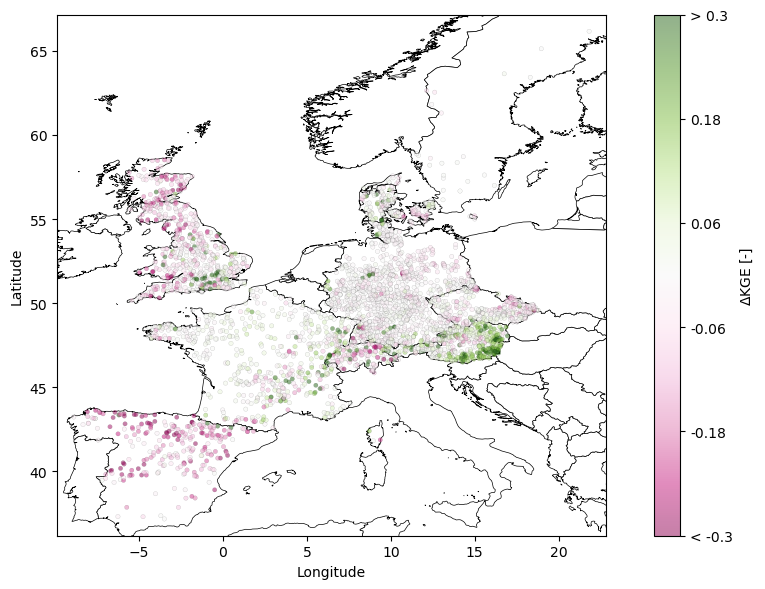

In [26]:
import matplotlib.pyplot as plt
import numpy as np

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.3, upper=0.3)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot basemap
world.plot(ax=ax, color='white', edgecolor='k', linewidth=0.5)

# Create scatter plot
sc = ax.scatter(
    df["lon_snap"], df["lat_snap"],
    c=df["diff"], cmap="PiYG", s=10, edgecolor="k", linewidths=0.1, vmin=-0.3, vmax=0.3, alpha=0.5
)

# Custom ticks and labels
ticks = np.linspace(-0.3, 0.3, num=6)  # Adjust number of ticks if needed
tick_labels = [f"< -0.3"] + [f"{t:.2f}" for t in ticks[1:-1]] + [f"> 0.3"]

# Create colorbar without arrows
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label(r"$\Delta$KGE [-]")
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

# Axis labels and limits
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim(df["lon_snap"].min() - 1, df["lon_snap"].max() + 1)
ax.set_ylim(df["lat_snap"].min() - 1, df["lat_snap"].max() + 1)

plt.grid(False)
plt.tight_layout()

plt.savefig("results/figs/maps.png", dpi=300)

plt.show()

In [27]:
network_basins["area"] = network_basins["area_estreams"]

In [28]:
correlations_df = network_basins.iloc[:, 47:].corr(method="spearman")["diff"]

correlations_df[abs(correlations_df)>0.1]

q_mean                      -0.186068
q_runoff_ratio              -0.311866
q_elas_Sankarasubramanian    0.108183
slope_sawicz                -0.148865
baseflow_index               0.114256
hfd_mean                     0.156650
q_95                        -0.198454
lq_dur                      -0.108054
pet_mean                     0.109929
p_seasonality                0.287323
frac_snow                    0.134098
hp_freq                      0.125095
hp_time                      0.148412
lp_time                     -0.180671
root_dep_max                -0.285569
soil_bd_mean                 0.157680
soil_oc_mean                -0.171480
lulc_2006_urban              0.212480
lulc_2006_grass             -0.242805
lulc_2006_agriculture        0.105225
dam_num                     -0.116314
res_num                     -0.119785
stations_num_p_mean          0.261416
stations_num_t_mean          0.397875
diff                         1.000000
Name: diff, dtype: float64

In [29]:
network_basins.iloc[:, 52:]

,hfd_mean,hfd_std,q_5,q_95,hq_freq,hq_dur,lq_freq,lq_dur,zero_q_freq,p_mean,...,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean,stations_num_t_mean,diff,area
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000002,247.952,10.932,0.980,10.727,0.964,2.440,5.470,13.308,0.0,3.912,...,0.0,0.0,0.0,0.00,0.00,36.284,14.0,13.0,0.006789,102.287
AT000003,233.361,27.141,0.404,2.819,6.136,2.609,NaN,NaN,0.0,3.693,...,4.0,4.0,3.0,1.46,12.91,36.927,18.0,18.0,0.606287,536.299
AT000005,239.207,14.642,1.064,7.692,0.233,1.400,NaN,NaN,0.0,4.048,...,1.0,1.0,1.0,0.89,8.27,34.486,10.0,10.0,0.011733,72.448
AT000007,233.806,15.056,0.689,4.835,0.378,1.556,0.486,2.000,0.0,3.916,...,7.0,6.0,5.0,2.67,23.90,32.887,40.0,38.0,0.266711,1143.768
AT000008,219.167,14.473,0.734,5.643,2.097,1.585,2.194,8.500,0.0,3.930,...,0.0,0.0,0.0,0.00,0.00,27.201,8.0,6.0,0.235233,69.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000091,170.611,33.217,0.102,1.791,NaN,NaN,37.776,52.226,0.0,1.909,...,0.0,0.0,20.0,26.34,184.11,14.816,4.0,1.0,0.006283,160.157
SE000277,154.153,27.428,0.357,2.744,NaN,NaN,2.989,12.167,0.0,2.253,...,0.0,0.0,29.0,50.78,541.40,13.610,12.0,8.0,0.005889,774.258
SE000283,227.417,13.739,0.469,6.202,3.631,2.891,5.514,19.238,0.0,2.135,...,0.0,0.0,15.0,3.35,14.59,35.366,10.0,6.0,-0.035779,1086.581


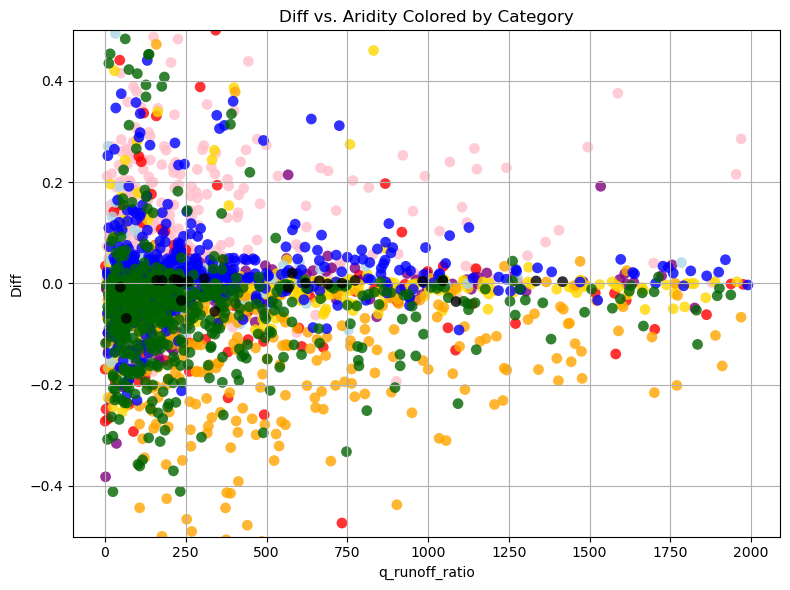

In [34]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'aridity', 'diff', and 'color' columns
plt.figure(figsize=(8, 6))

# Scatter plot using the 'color' column for coloring
plt.scatter(network_basins["area"], network_basins["diff"], c=network_basins["color"], edgecolor="none", s=60, alpha=0.8)

plt.xlabel("q_runoff_ratio")
plt.ylabel("Diff")
plt.title("Diff vs. Aridity Colored by Category")
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.tight_layout()

plt.show()


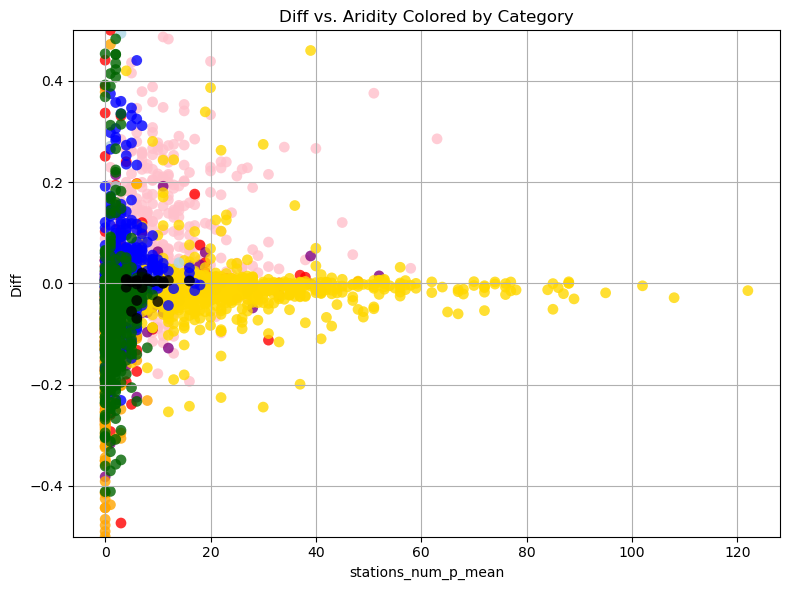

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'aridity', 'diff', and 'color' columns
plt.figure(figsize=(8, 6))

# Scatter plot using the 'color' column for coloring
plt.scatter(network_basins["stations_num_p_mean"], network_basins["diff"], c=network_basins["color"], edgecolor="none", s=60, alpha=0.8)

plt.xlabel("stations_num_p_mean")
plt.ylabel("Diff")
plt.title("Diff vs. Aridity Colored by Category")
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.tight_layout()

plt.show()


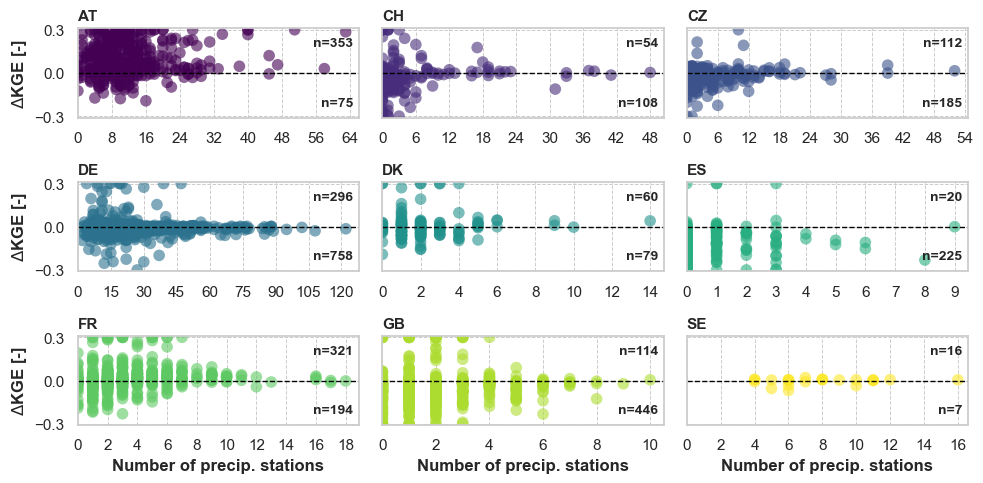

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.0)

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.3, upper=0.3)

# Get unique color groups
groups = df['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country
color_to_country = df.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Generate professional color palette (Spectral is good for diverging data)
cmap = cm.get_cmap("viridis", n_groups)
new_colors = [mcolors.to_hex(cmap(i)) for i in range(n_groups)]
group_to_color = dict(zip(groups, new_colors))

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = df[df['color'] == color]
    country = color_to_country[color]
    plot_color = group_to_color[color]

    # Use seaborn scatterplot for consistency
    sns.scatterplot(
        ax=axes[i],
        x=group_df["stations_num_p_mean"],
        y=group_df["diff"],
        color=plot_color,
        edgecolor='none',
        s=70,
        alpha=0.6
    )

    axes[i].set_title(f"{country}", fontsize=11, fontweight="bold", loc="left")
    
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("Number of precip. stations", fontweight="bold")
    else:
        axes[i].set_xlabel("")

    if i % n_cols == 0:
        axes[i].set_ylabel(r"$\Delta$KGE [-]", fontweight="bold")
    else:
        axes[i].set_ylabel("")

    axes[i].set_ylim(-0.31, 0.31)
    axes[i].set_xlim(left=0)
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    #axes[i].axhline(-0.3, color='black', linestyle='--', linewidth=1)
    #axes[i].axhline(0.3, color='black', linestyle='--', linewidth=1)
    #axes[i].set_yticks([-0.3, -0.15, 0, 0.15, 0.3])
    axes[i].set_yticks([-0.3, 0, 0.3])

    axes[i].grid(True, which='both', linestyle='--', linewidth=0.7)

    # Annotate counts
    n_above = (group_df['diff'] > 0).sum()
    n_below = (group_df['diff'] < 0).sum()

    axes[i].text(
        0.98, 0.9,
        f"n={n_above}",
        transform=axes[i].transAxes,
        ha="right", va="top",
        fontsize=10, fontweight="bold"
    )

    axes[i].text(
        0.98, 0.1,
        f"n={n_below}",
        transform=axes[i].transAxes,
        ha="right", va="bottom",
        fontsize=10, fontweight="bold"
    )

# Delete unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.savefig("results/figs/kge_scatters_pstations.png", dpi=300, bbox_inches='tight')
plt.show()

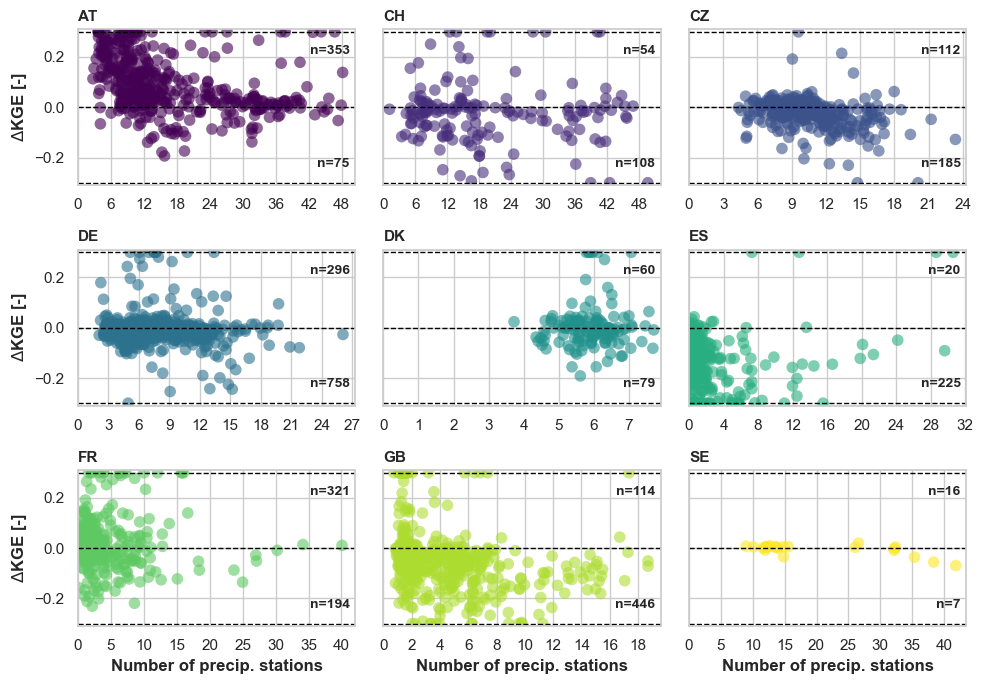

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.0)

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.3, upper=0.3)

# Get unique color groups
groups = df['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country
color_to_country = df.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Generate professional color palette (Spectral is good for diverging data)
cmap = cm.get_cmap("viridis", n_groups)
new_colors = [mcolors.to_hex(cmap(i)) for i in range(n_groups)]
group_to_color = dict(zip(groups, new_colors))

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 7), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = df[df['color'] == color]
    country = color_to_country[color]
    plot_color = group_to_color[color]

    # Use seaborn scatterplot for consistency
    sns.scatterplot(
        ax=axes[i],
        x=group_df["sno_cov_mean"],
        y=group_df["diff"],
        color=plot_color,
        edgecolor='none',
        s=70,
        alpha=0.6
    )

    axes[i].set_title(f"{country}", fontsize=11, fontweight="bold", loc="left")
    
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("Number of precip. stations", fontweight="bold")
    else:
        axes[i].set_xlabel("")

    if i % n_cols == 0:
        axes[i].set_ylabel(r"$\Delta$KGE [-]", fontweight="bold")
    else:
        axes[i].set_ylabel("")

    axes[i].set_ylim(-0.31, 0.31)
    axes[i].set_xlim(left=0)
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i].axhline(-0.3, color='black', linestyle='--', linewidth=1)
    axes[i].axhline(0.3, color='black', linestyle='--', linewidth=1)

    # Annotate counts
    n_above = (group_df['diff'] > 0).sum()
    n_below = (group_df['diff'] < 0).sum()

    axes[i].text(
        0.98, 0.9,
        f"n={n_above}",
        transform=axes[i].transAxes,
        ha="right", va="top",
        fontsize=10, fontweight="bold"
    )

    axes[i].text(
        0.98, 0.1,
        f"n={n_below}",
        transform=axes[i].transAxes,
        ha="right", va="bottom",
        fontsize=10, fontweight="bold"
    )

# Delete unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.savefig("results/figs/kge_scatters_sno_cov_mean.png", dpi=300, bbox_inches='tight')
plt.show()

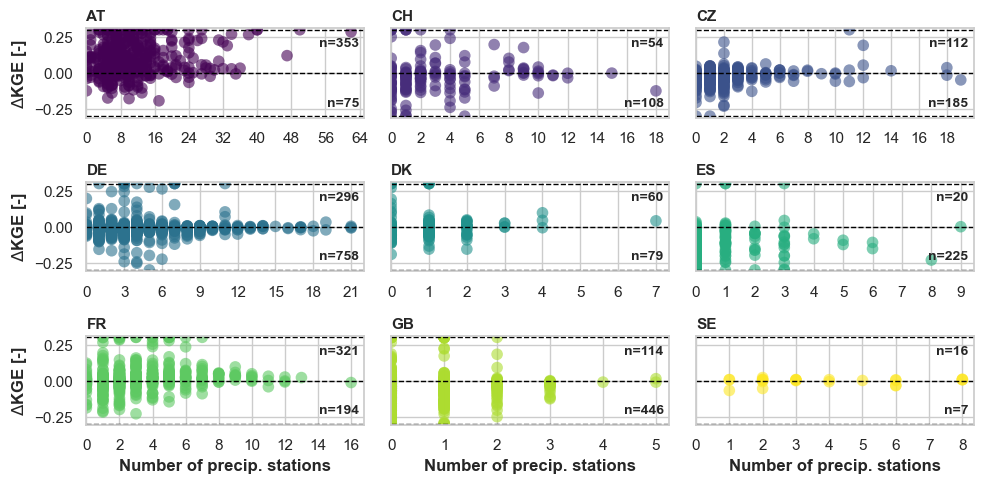

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.0)

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.3, upper=0.3)

# Get unique color groups
groups = df['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country
color_to_country = df.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Generate professional color palette (Spectral is good for diverging data)
cmap = cm.get_cmap("viridis", n_groups)
new_colors = [mcolors.to_hex(cmap(i)) for i in range(n_groups)]
group_to_color = dict(zip(groups, new_colors))

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = df[df['color'] == color]
    country = color_to_country[color]
    plot_color = group_to_color[color]

    # Use seaborn scatterplot for consistency
    sns.scatterplot(
        ax=axes[i],
        x=group_df["stations_num_t_mean"],
        y=group_df["diff"],
        color=plot_color,
        edgecolor='none',
        s=70,
        alpha=0.6
    )

    axes[i].set_title(f"{country}", fontsize=11, fontweight="bold", loc="left")
    
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("Number of precip. stations", fontweight="bold")
    else:
        axes[i].set_xlabel("")

    if i % n_cols == 0:
        axes[i].set_ylabel(r"$\Delta$KGE [-]", fontweight="bold")
    else:
        axes[i].set_ylabel("")

    axes[i].set_ylim(-0.31, 0.31)
    axes[i].set_xlim(left=0)
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i].axhline(-0.3, color='black', linestyle='--', linewidth=1)
    axes[i].axhline(0.3, color='black', linestyle='--', linewidth=1)

    # Annotate counts
    n_above = (group_df['diff'] > 0).sum()
    n_below = (group_df['diff'] < 0).sum()

    axes[i].text(
        0.98, 0.9,
        f"n={n_above}",
        transform=axes[i].transAxes,
        ha="right", va="top",
        fontsize=10, fontweight="bold"
    )

    axes[i].text(
        0.98, 0.1,
        f"n={n_below}",
        transform=axes[i].transAxes,
        ha="right", va="bottom",
        fontsize=10, fontweight="bold"
    )

# Delete unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.savefig("results/figs/kge_scatters_stations_num_t_mean.png", dpi=300, bbox_inches='tight')
plt.show()

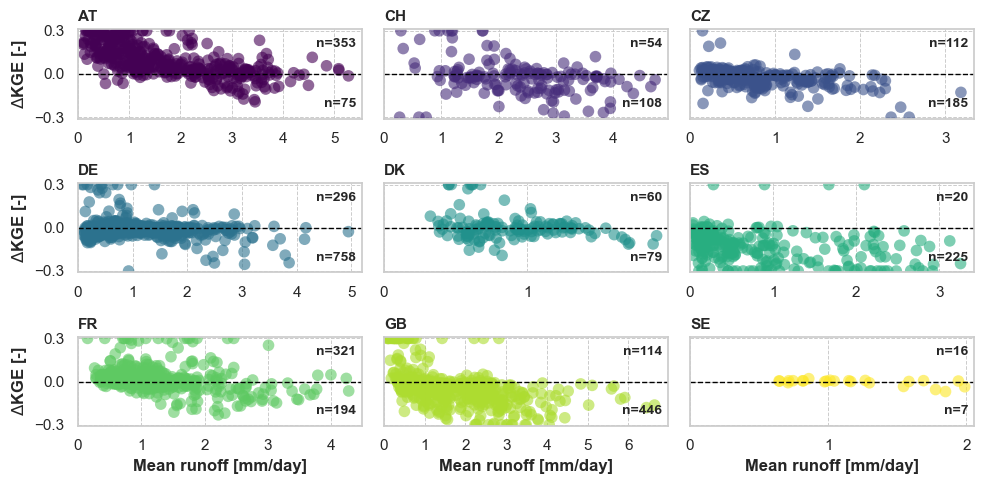

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.0)

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.3, upper=0.3)

# Get unique color groups
groups = df['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country
color_to_country = df.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Generate professional color palette (Spectral is good for diverging data)
cmap = cm.get_cmap("viridis", n_groups)
new_colors = [mcolors.to_hex(cmap(i)) for i in range(n_groups)]
group_to_color = dict(zip(groups, new_colors))

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = df[df['color'] == color]
    country = color_to_country[color]
    plot_color = group_to_color[color]

    # Use seaborn scatterplot for consistency
    sns.scatterplot(
        ax=axes[i],
        x=group_df["q_mean"],
        y=group_df["diff"],
        color=plot_color,
        edgecolor='none',
        s=70,
        alpha=0.6
    )

    axes[i].set_title(f"{country}", fontsize=11, fontweight="bold", loc="left")
    
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("Mean runoff [mm/day]", fontweight="bold")
    else:
        axes[i].set_xlabel("")

    if i % n_cols == 0:
        axes[i].set_ylabel(r"$\Delta$KGE [-]", fontweight="bold")
    else:
        axes[i].set_ylabel("")

    axes[i].set_ylim(-0.31, 0.31)
    axes[i].set_xlim(left=0)
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    #axes[i].axhline(-0.3, color='black', linestyle='--', linewidth=1)
    #axes[i].axhline(0.3, color='black', linestyle='--', linewidth=1)
    #axes[i].set_yticks([-0.3, -0.15, 0, 0.15, 0.3])
    axes[i].set_yticks([-0.3, 0, 0.3])

    axes[i].grid(True, which='both', linestyle='--', linewidth=0.7)

    # Annotate counts
    n_above = (group_df['diff'] > 0).sum()
    n_below = (group_df['diff'] < 0).sum()

    axes[i].text(
        0.98, 0.9,
        f"n={n_above}",
        transform=axes[i].transAxes,
        ha="right", va="top",
        fontsize=10, fontweight="bold"
    )

    axes[i].text(
        0.98, 0.1,
        f"n={n_below}",
        transform=axes[i].transAxes,
        ha="right", va="bottom",
        fontsize=10, fontweight="bold"
    )

# Delete unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.savefig("results/figs/kge_scatters_qmean.png", dpi=300, bbox_inches='tight')
plt.show()

In [106]:
correlations_df[abs(correlations_df)>0.05]

q_mean                      -0.186068
q_runoff_ratio              -0.311866
q_elas_Sankarasubramanian    0.108183
slope_sawicz                -0.148865
baseflow_index               0.114256
hfd_mean                     0.156650
q_5                         -0.055784
q_95                        -0.198454
hq_freq                     -0.054444
lq_freq                     -0.099526
lq_dur                      -0.108054
zero_q_freq                 -0.085741
p_mean                       0.063268
pet_mean                     0.109929
p_seasonality                0.287323
frac_snow                    0.134098
hp_freq                      0.125095
hp_time                      0.148412
lp_freq                      0.057716
lp_time                     -0.180671
ele_mt_min                   0.055482
slp_dg_mean                 -0.051480
flat_area_fra                0.052502
steep_area_fra              -0.057789
root_dep_mean               -0.061335
root_dep_max                -0.285569
root_dep_min